# Tutorial on Data Science in Astrophysics - EASW9

##### Prepared by Kono Kai, Shuntaro Yoshida and Suchetha Cooray ($\Omega$ Lab, NU)

### The point of this tutorial is NOT to make you data scientists in 1.5 hrs. This tutorial will hopefully give you the first steps for you to experience "some" data science techniques. 

We will cover the following areas of data science
- Data input
- Simple data handling
- Data visualization
- Data analysis with linear regression (example with a package)
- Parameter estimation (linear regression) with Markov chain Monte Carlo (MCMC)

### For data science, Python with jupyter notebooks are a very convinient tool. Therefore, we would like to demonstrate how to use them.

### Firstly, why jupyter notebooks?

From the official documentation,

*Notebook documents (or “notebooks”, all lower case) are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc…). Notebook documents are both human-readable documents containing the analysis description and the results (figures, tables, etc..) as well as executable documents which can be run to perform data analysis.*

https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html#notebook-document

With that out of the way, let's start data science!

## Today we will work with data from a galaxy survey and do some simple data analysis.

In [1]:
# import python libraries for this notebook
%matplotlib inline

import matplotlib.pyplot as plt # Standard plotting library in python
import numpy as np              # Fundamnetal scientific computing library for handling arrays, etc. 
import pandas as pd             # Python Data Analysis Library for easy-to-use data structures
                                
# Scipy is an important scientific computing library with various useful functions
from scipy import stats         # stats module contain many statatistical funtions
from scipy import optimize      # optimize module provides functions for minimizing (or maximizing) 
                                #     objective functions

from tqdm import tnrange        # Progress bar module for interactivity

If you get an "ImportError", you might be missing some libraries.
In that case, you should run the following lines on a new cell to install those libraries:

> if you can use conda -> !conda install {library name(e.g. scipy, tqdm)} --yes

> if you can use pip -> !pip install {library name(e.g. scipy, tqdm)}

In [2]:
# Set the fontsize on this notebook
plt.rcParams['font.size'] = 30

## 1) Read the data 

Python is easy to read a datafile with pandas.

"pandas" is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

In [3]:
# Read the csv file that contain VLA-COSMOS survey data (Laigle et al. 2016; Smolcic et al. 2017)
df_COSMOS = pd.read_csv('PythonLectureAtEASW19.csv', index_col=0)

# Set the number of columns showing on this notebook
pd.set_option('display.max_columns', len(df_COSMOS.columns), 
              'display.max_info_columns', len(df_COSMOS.columns))

## 2) Simple data handling

Pandas makes it easier to see "what" kind of data is in the data frame compared to a "traditional" array using numpy.

In [4]:
# Show the datatype of "df_COSMOS" -> this data is called "pandas dataframe"
type(df_COSMOS)

pandas.core.frame.DataFrame

In [5]:
# Show the shape of "df_COSMOS" -> (# of rows, # of columns)
df_COSMOS.shape

(8631, 24)

In [6]:
# Show the first n (default : n=5) rows. You can also see the last n columns with .tail() instead of .head().
df_COSMOS.head()

,zbest,F3GHz,logL10cm,logL21cm,logLTIRSF,SFG,MNUV,MU,MB,MV,MR,MI,MZ,MY,MJ,MH,MK,MASS_MED,MASS_BEST,SFR_MED,SFR_BEST,L_NU,L_R,L_K
0,1.5457,16147.040,25.839252,25.717876,11.662600,0.0,-18.623,-21.464,-22.299,-22.895,-23.048,-23.374,-23.643,-23.797,-24.214,-24.530,-24.284,11.14200,11.13040,-1.405420,-1.437410,27.746549,29.877626,30.193749
1,1.5410,15602.200,26.238592,26.457530,11.540435,0.0,-21.098,-21.800,-21.964,-22.545,-22.783,-22.839,-23.229,-23.008,-23.349,-23.627,-23.510,10.05510,10.06290,2.390100,2.346580,30.332119,30.175826,30.110579
2,1.5550,11369.180,25.802593,25.771760,12.118613,0.0,-16.628,-18.416,-18.701,-19.737,-17.158,-20.573,-20.255,-20.408,-20.538,-20.761,-20.594,9.41667,9.48718,0.751766,0.353600,28.486889,28.870496,28.899489
3,2.4455,7746.012,26.569344,26.904280,12.010794,0.0,-19.770,-22.131,-23.097,-23.559,-23.815,-24.036,-24.248,-24.357,-24.466,-24.653,-24.444,11.05550,11.06550,-2.259780,-2.263600,28.375499,30.151526,30.382799
4,1.2590,9212.930,25.896793,26.196741,11.263206,0.0,-18.524,-20.865,-21.731,-22.408,-22.792,-23.254,-23.441,-23.656,-23.831,-24.116,-24.101,11.19990,11.22430,0.700190,0.749476,28.911759,30.003326,30.286759


In [7]:
# Show information of pandas dataframe (e.g. the number of non-null values)
df_COSMOS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8631 entries, 0 to 8807
Data columns (total 24 columns):
zbest        8631 non-null float64
F3GHz        8631 non-null float64
logL10cm     8631 non-null float64
logL21cm     8631 non-null float64
logLTIRSF    8631 non-null float64
SFG          8631 non-null float64
MNUV         8631 non-null float64
MU           8631 non-null float64
MB           8631 non-null float64
MV           8631 non-null float64
MR           8631 non-null float64
MI           8631 non-null float64
MZ           8631 non-null float64
MY           8631 non-null float64
MJ           8631 non-null float64
MH           8631 non-null float64
MK           8631 non-null float64
MASS_MED     8631 non-null float64
MASS_BEST    8631 non-null float64
SFR_MED      8631 non-null float64
SFR_BEST     8631 non-null float64
L_NU         8631 non-null float64
L_R          8631 non-null float64
L_K          8631 non-null float64
dtypes: float64(24)
memory usage: 1.6 MB


In [8]:
# Show the statistics of each columns (count, mean, standard deviation(std), min, quartiles and max)
df_COSMOS.describe()

,zbest,F3GHz,logL10cm,logL21cm,logLTIRSF,SFG,MNUV,MU,MB,MV,MR,MI,MZ,MY,MJ,MH,MK,MASS_MED,MASS_BEST,SFR_MED,SFR_BEST,L_NU,L_R,L_K
count,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000,8631.000000
mean,1.322454,117.042183,23.165601,23.410598,10.567795,0.629243,-22.539491,-20.788226,-21.426523,-21.917994,-22.215429,-22.540415,-22.835689,-23.038633,-23.251693,-23.548910,-23.430137,10.661476,10.668357,1.119998,0.762818,29.314036,29.950311,30.021740
std,0.840792,1282.494254,1.207466,1.223907,3.235726,0.483035,15.725004,1.201650,1.150912,1.135125,1.127440,1.130181,1.133250,1.142289,1.153212,1.162435,1.154851,0.501132,0.530574,1.264983,2.863733,0.946616,0.511620,0.473196
min,0.000000,10.819050,0.000000,0.000000,0.000000,0.000000,-97.729000,-24.280000,-24.805000,-25.221000,-25.597000,-25.667000,-26.143000,-26.522000,-26.883000,-27.352000,-27.377000,7.012500,5.317720,-5.974820,-31.315800,23.596159,24.735016,24.694819
25%,0.699550,16.468400,22.716698,22.953752,10.924591,0.000000,-20.165500,-21.550000,-22.143500,-22.620000,-22.905000,-23.228000,-23.522000,-23.725000,-23.944000,-24.234000,-24.104500,10.418700,10.419100,0.501507,0.463934,28.649159,29.679376,29.811774
50%,1.145800,25.696080,23.227410,23.464403,11.463945,1.000000,-19.112000,-20.861000,-21.513000,-22.006000,-22.306000,-22.630000,-22.931000,-23.143000,-23.360000,-23.662000,-23.536000,10.705600,10.724600,1.507640,1.424800,29.560719,29.978326,30.063189
75%,1.801950,44.174970,23.703326,23.943610,11.934950,1.000000,-18.047000,-20.129500,-20.811500,-21.332000,-21.651000,-21.988500,-22.293000,-22.502000,-22.718000,-23.037500,-22.922000,10.992300,11.000650,1.934220,1.895460,30.008519,30.273126,30.295034
max,6.062000,80250.000000,27.047028,27.512434,13.523303,1.000000,-11.464000,-8.428000,-9.083000,-9.373000,-9.574000,-9.847000,-9.915000,-9.976000,-10.065000,-10.223000,-10.503000,12.316700,12.323000,3.567890,3.589270,31.625819,31.611726,31.631439


## 3) Data visualization

We can first try to understand the redshift distribution of our galaxy sample. The best for this purpose is a histogram.

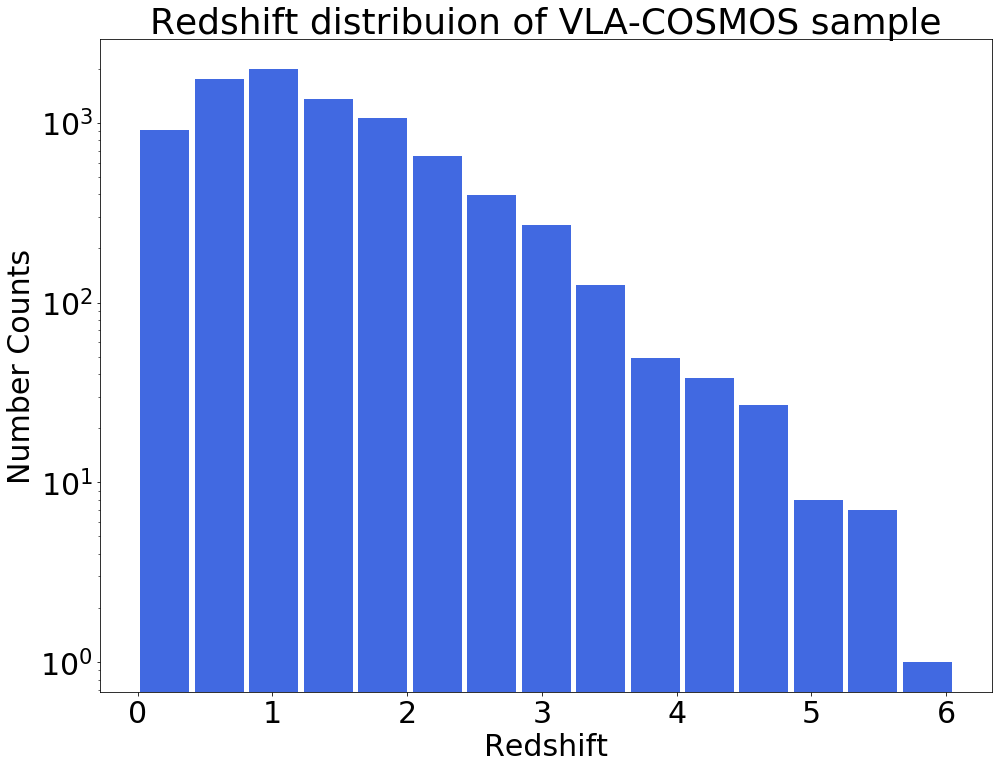

In [9]:
# Plot a histogram of redshift for all VLA-COSMOS samples
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.hist(df_COSMOS['zbest'], bins=15, rwidth=0.9, color='royalblue')

# or just simply
# plt.hist(df_COSMOS['zbest'], bins=15, rwidth=0.9, color='royalblue')

# A pandas dataframe is easy to plot with attributes (e.g. .hist(), .plot())
# df_COSMOS.hist(column='zbest', figsize=(16, 9), bins=15, rwidth=0.9, color='royalblue')

# Set the title of the figure
plt.title('Redshift distribuion of VLA-COSMOS sample')

# Set the x and y labels
plt.xlabel('Redshift')
plt.ylabel('Number Counts')

# Change the y-scale into 'log'
plt.yscale('log')

# Save this figure (if you want to output pdf file, you change .png into .pdf)
# plt.savefig(fname="Redshift_dist_VLA-COSMOS.png", dpi = 200)

Now let's try plotting a 2D scatter plot with two data columns. Let us say we choose stellar mass ($M_*$) and luminosity in the K-band ($L_K$) in log space.

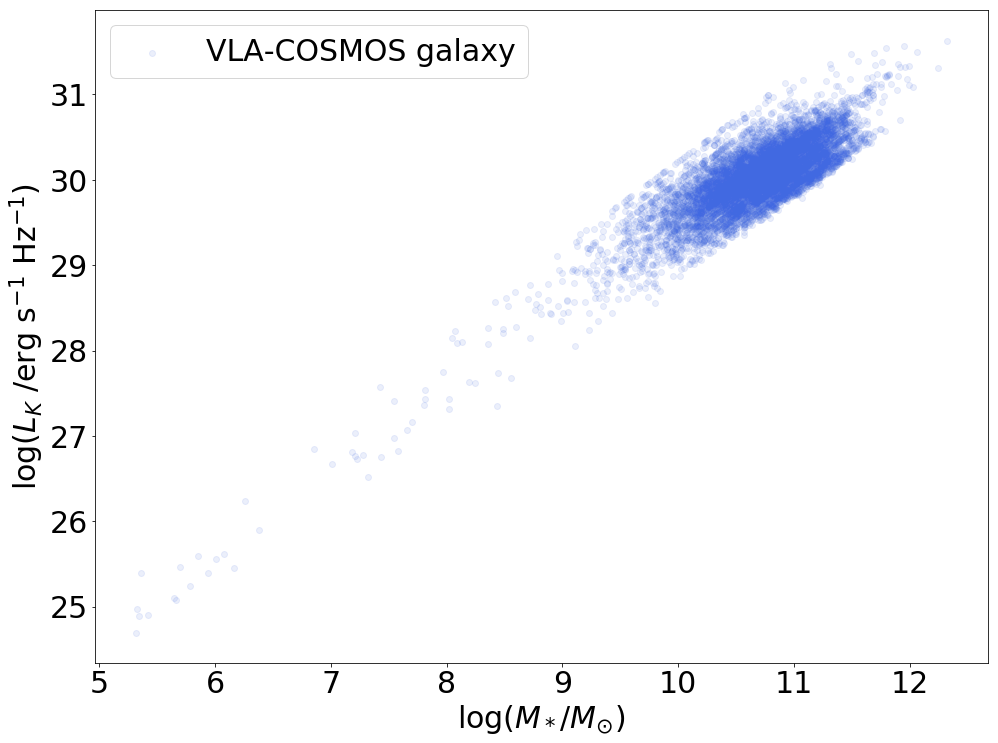

In [10]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(df_COSMOS['MASS_BEST'], df_COSMOS['L_K'], color='royalblue', alpha=0.1, label='VLA-COSMOS galaxy')

# Set axis labels
ax.set_xlabel(r'$\log (M_*/M_{\odot})$')
ax.set_ylabel(r'$\log (L_K$ /${\rm erg\ s^{-1}\ Hz^{-1}})$')

# Set plotting range of x
# ax.set_xlim([6, 13])

# When you want to show the label, you have to run the following line
ax.legend(loc='best')

Here, the distribution of $M_*{\mbox -}L_K$ seems to have a linear relation with two parameters $a$ and $b$ which correspond to slope and intercept respectively.

$$
\log (M_*/M_{\odot})=a\log(L_K)+b
$$

We have considered the whole sample. However, we are now interested only in star forming galaxies (SFGs). We limit our sample to galaxy with the "SFG" flag equal to one. 

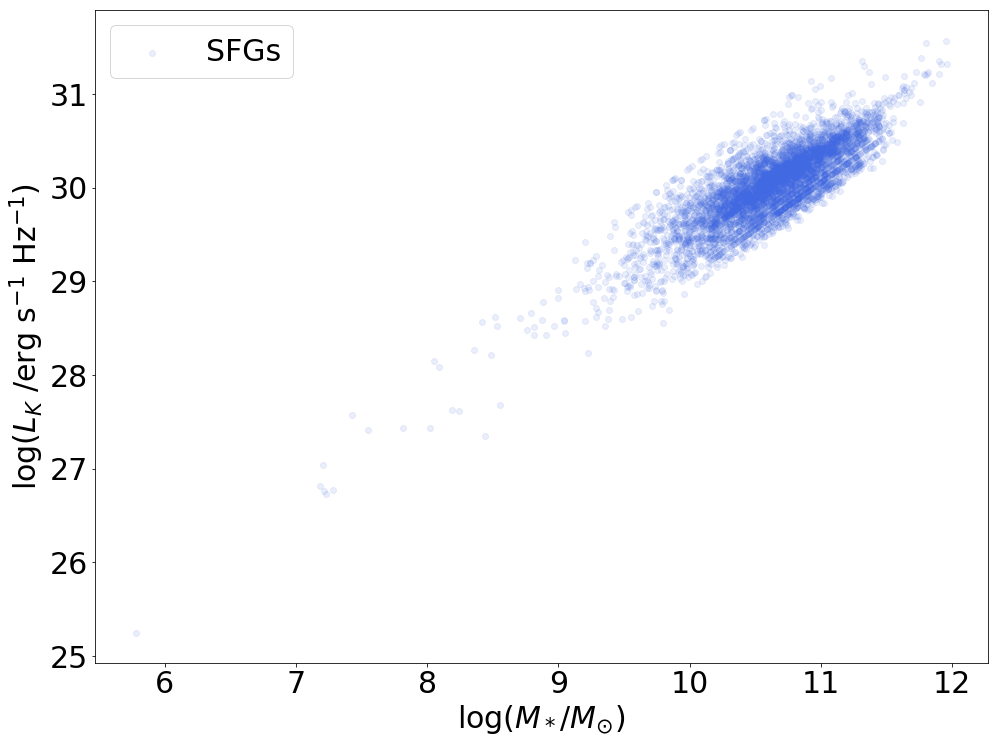

In [11]:
# We define a new DataFrame with only SFG
df_SFG = df_COSMOS.query('SFG == 1')

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(df_SFG['MASS_BEST'], df_SFG['L_K'], color='royalblue', alpha=0.1, label='SFGs')
ax.set_xlabel(r'$\log (M_*/M_{\odot})$')
ax.set_ylabel(r'$\log (L_K$ /${\rm erg\ s^{-1}\ Hz^{-1}})$')

ax.legend(loc='best')

By visual inspection, the linear relationship appears to be much more apparent now.

### Let us try linear least-squares regression for these sets of measurements!

## 4) Linear Regression

Let us try two methods to do regression.

First method is using the `scipy.stats` module. This module contains the `linregress`, function for linear least-squares regression.

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_SFG['MASS_BEST'], df_SFG['L_K'])
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 0.781292    intercept: 21.725769


The second method is by using `scipy.optimize.curve_fit`. This method allows fitting any user defined function. 

In [13]:
def linear_curve(x, a, b):
    return a*x + b

popt, pcov = optimize.curve_fit(f=linear_curve, xdata=df_SFG['MASS_BEST'], ydata=df_SFG['L_K'])

print("slope: %f    intercept: %f" % (popt[0], popt[1]))

slope: 0.781292    intercept: 21.725769


Simple as that! We get similar results from both the methods. Let us plot the `lingress` result on our scatter plot.

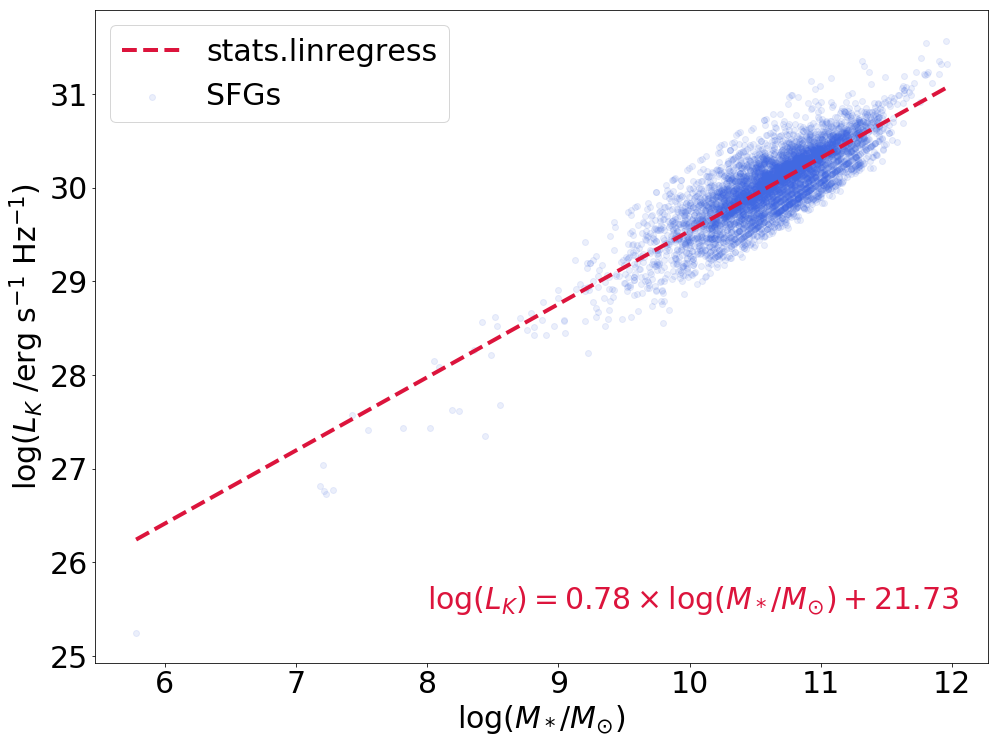

In [14]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(df_SFG['MASS_BEST'], df_SFG['L_K'], color='royalblue', alpha=0.1, label='SFGs')
ax.set_xlabel(r'$\log (M_*/M_{\odot})$')
ax.set_ylabel(r'$\log (L_K$ /${\rm erg\ s^{-1}\ Hz^{-1}})$')

x_plot=np.linspace(df_SFG['MASS_BEST'].min(), df_SFG['MASS_BEST'].max(), 1000)

# Plotting the fit result
ax.plot(x_plot, slope * x_plot + intercept, lw=4, color='crimson', label='stats.linregress', linestyle='dashed')

plt.text(8, 25.5, r'$\log{(L_K)}=%01.2f \times \log{(M_*/M_{\odot})}+%01.2f$'%(slope, intercept), 
         size=30, color='crimson')

ax.legend(loc='best')

## 5) Parameter estimation by Markov Chain Monte Carlo

The estimated slope and intercept are just parameters. **We can use a Bayesian approach and use Markov Chain Monte Carlo (MCMC) to determine our parameters and their posterior distributions**.

Most important advantage of using a bayesian approach is that we can encorporate a prior for our parameter estimates. As the problems get more complicated, priors are crucial in guiding to acceptable results. 

Let us try to use MCMC to find the parameters of our linear model to $M_*{\mbox -}L_K$ data.

Firstly, we need to assume a prior distribution of parameters.

In this tutorial, we assume that the prior distribution of intercept and slope is normal distribution with mean $\mu=0.5$ and standard deviation $\sigma=0.5$.

$$
\mathcal{N}(\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp{\biggl(-\frac{(x-\mu)^2}{2\sigma^2}\biggr)}
$$

The likelihood function is obtained as below. 

$$
L ( p ) = \prod _ { i = 1 } ^ { n } f \left( x _ { i } ; p \right)
$$

For computational reasons, the log-likelihood is often used.  

Then the posterior distribution for each step can be calculated using the likelihood and prior probability.

In [15]:
def prior_probability(theta):
    a = theta[0]    # intercept
    b = theta[1]    # slope
    a_prior = stats.norm(0.5, 0.5).pdf(a)
    b_prior = stats.norm(0.5, 0.5).pdf(b)
    return np.log(a) + np.log(b)

def log_likelihood(theta):
    a = theta[0]    # intercept
    b = theta[1]    # slope
    y_predict = a  + b * df_SFG['MASS_BEST'] 
    likelihoods = stats.norm(y_predict, sigma_e).pdf(df_SFG['L_K']) 
    return np.sum(np.log(likelihoods))

def posterior_probability(theta):
    return log_likelihood(theta) + prior_probability(theta)

The posterior distribution can be used to estimate our parameters. In this case from our prior and the liklihoods, we expect the posterior to have normal distributions with the mean as the best estimates of the parameters.

### Here onwards, we perform the Markov chain Monte Carlo (MCMC). 

MCMC is a method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. This sequence can be used to approximate the distribution (e.g. to generate a histogram) or to compute an integral (e.g. an expected value). In this case, we want the posterior distributions of the parameters. Sequential samples are simple Markov chains, that are random walks that depend only on the last location.

We will use the most famous MCMC algorithm known as the **Metropolis-Hastings (MH) algorithm**.

**The goal is to design the Markov chain to converge to the desired posterior distribution.**

Therefore, as more and more sample values are produced, the distribution of values more closely approximates the desired distribution (i.e. posterior distribution).

The algorithm procceeds as follows;

1. Initialization - Determine the initial value of parameter $\theta^{(0)}$. Here, ${\bf \theta}^{(0)}=(0.5,0.5)$ this time.

This part gives initial condition of the Markov chain.  Here, $(a^{(0)},b^{(0)})=(0.5,0.5)$ and set the iteration count.

In [16]:
sigma_e = 3
N_iteration = 20000           # the number of the iteration
theta_0 = [0.5, 0.5]         # start value
# theta_0 = [20, 1]          # start value

2. For each iteration from here onwards, 
    * **Generate**: Propose a new value for $t^{\text{th}}$ value of $\theta$.
    
    * **Calculate**: Calculate the acceptance probability $\alpha$ of the newly proposed $\theta^{(t)}$.
    
        $$
         \alpha(\theta^{(t-1)},\tilde{\theta}) = \min{\biggl\{1,\frac{q(\tilde{\theta}|\theta^{(t-1)})}{q(\theta^{(t-1)}|\tilde{\theta})}\frac{p(\tilde{\theta})}{p(\theta^{(t-1)})} \biggr\}}
        $$
        
    * **Accept or Reject**: The decicsion whether the new parameter is to be accepted is decided by the following   
    
        $$
        \theta^{(t)}= \begin{cases}
        \tilde{\theta} & (U \leq \alpha(\theta^{(t-1)},\tilde{\theta}) \\
        \theta^{(t-1)} & (U>\alpha(\theta^{(t-1)},\tilde{\theta})).
        \end{cases}
        $$
        where $U$ is a random number drawn from a uniform distribution and $U \in [0,1]$.

The following is done below. This may take a relatively long time depending on your computer.

In [17]:
# The function that generates a new parameter for each iteration
def proposal_function(theta):
    a = theta[0]
    b = theta[1]
    a_new = np.random.normal(a, 0.5)
    b_new = np.random.normal(b, 0.5)
    theta_new = [a_new, b_new]
    return theta_new

# Define an array for the Markov chains
MCMC_result = np.zeros([N_iteration, 2])         
MCMC_result[0, 0] = theta_0[0]
MCMC_result[0, 1] = theta_0[1]

# MCMC iteration
for step in tnrange(1, N_iteration):

    theta_old = MCMC_result[step - 1, :]
    theta_proposal = proposal_function(theta_old)

    prob = np.exp(posterior_probability(theta_proposal) - posterior_probability(theta_old))

    if np.random.uniform(0,1) < prob:
        MCMC_result[step, :] = theta_proposal    
    else:
        MCMC_result[step, :] = theta_old

/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  
/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


In the Markov chain sampling, the chain is assumed to converge to an invariant distribution. A distirbution $\bar{p}$ is an invariant distribution of transition distirbution $Q(\theta,\tilde{\theta})$ when

$$
\bar{p}(\tilde{\theta})=\int^{\infty}_{\infty} \bar{p}(\theta)Q(\theta,\tilde{\theta}).
$$

Particulary, the posterior probability $p(\theta|D)$ need to be an invariant distribution for a Markov chain. The invariant distributions is the case when the Markov chain has converged. Therefore, the first several steps are to be throwed out. This fraction of the chain is called **burn-in fraction**. The behavior of the burn-in fraction is dependant on where your initialization points are. 

We can set the number of the steps to be throw out in the box below. A small number may cause to accept posterior distribution that has not converged to an invariant distribution.

In [23]:
burn_in = 5000
theta_posterior = MCMC_result[burn_in:, :]

# The estimates of the parameters can be done of the posterior distribution 
est_params = theta_posterior.mean(axis=0)
print("The estimated parameters by mean of the Markov chain are,")
print("slope =", est_params[1], " & intercept =", est_params[0])

The estimated parameters by mean of the Markov chain are,
slope = 0.8253443084181055  & intercept = 21.257605643146555


Let us plot the posterior values of intercept and slope and see the behavior of the Mrkov chain. We can see the convergence to the mean value (red-dashed line) if MCMC has succeeded.

*(Burn-in region is removed for calculating the mean value of each parameter)*

Text(0, 0.5, 'slope')

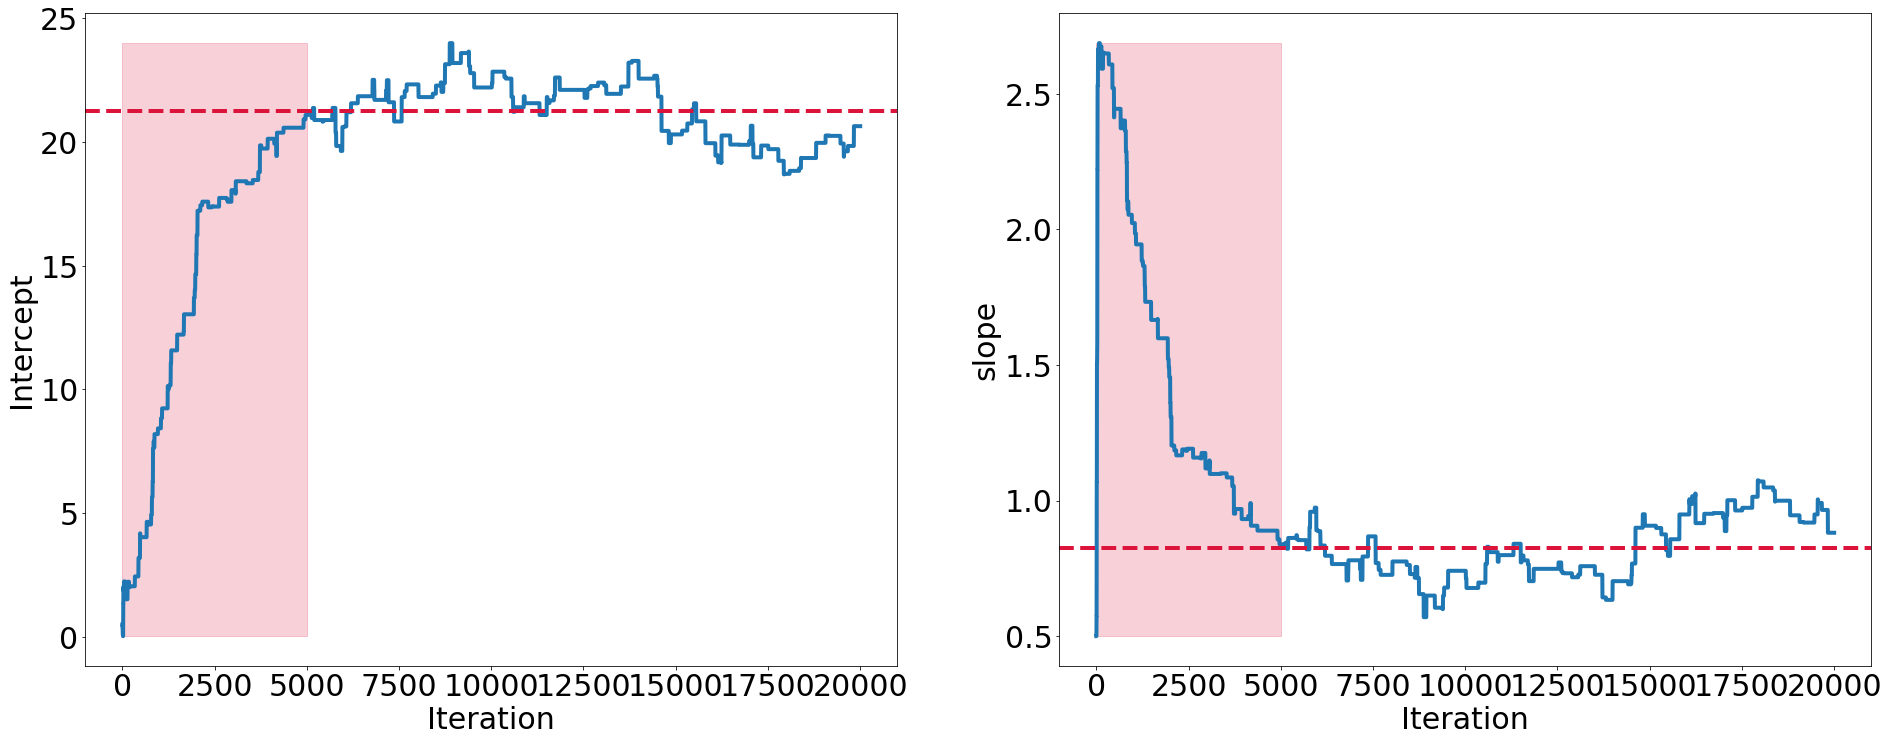

In [24]:
fig = plt.figure(figsize=(32, 12))
x_ = np.linspace(0, N_iteration, N_iteration)
ax1 = fig.add_subplot(121)
ax1.plot(x_, MCMC_result[:, 0], lw=4)
ax1.axhline(theta_posterior.mean(axis=0)[0], color='crimson', linestyle='dashed', lw=4)
ax1.fill_between([0, burn_in], MCMC_result[:, 0].min(), MCMC_result[:, 0].max(), 
                 color='crimson', alpha=0.2)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Intercept')

ax2 = fig.add_subplot(122)
ax2.plot(x_, MCMC_result[:, 1], lw=4)
ax2.axhline(theta_posterior.mean(axis=0)[1], color='crimson', linestyle='dashed', lw=4)
ax2.fill_between([0, burn_in], MCMC_result[:, 1].min(), MCMC_result[:, 1].max(), 
                 color='crimson', alpha=0.2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('slope')

We know that the posterior distribution is normal. Therefore, we can estimate the mean of the normal by fitting normal distributions to the results from the MCMC. The posterior distribution of the two parameters can be displayed as histograms.

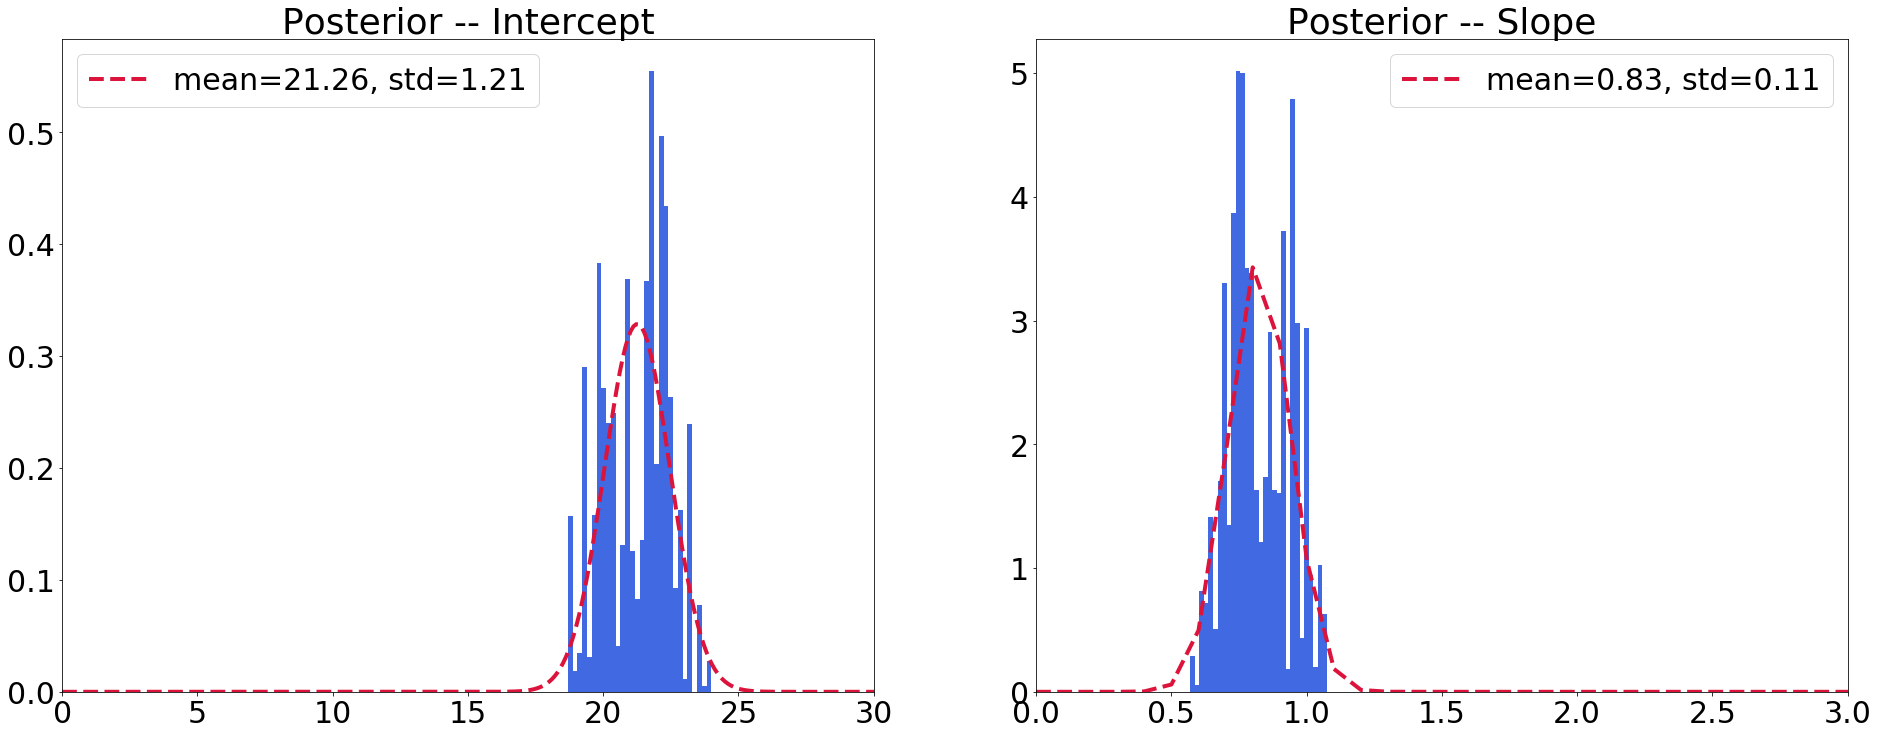

In [25]:
# gaussian fitting for an intercept
param1 = stats.norm.fit(theta_posterior[:,0])

# gaussian fitting and plot for a slope
param2 = stats.norm.fit(theta_posterior[:,1])

fig = plt.figure(figsize=(32, 12))
x_plot_MCMC = np.linspace(0, 100, 1000)

ax1 = fig.add_subplot(121)
ax1.hist(theta_posterior[:,0], bins=30, color='royalblue', density=True)
ax1.plot(x_plot_MCMC, stats.norm.pdf(x_plot_MCMC, loc=param1[0], scale=param1[1]), color='crimson',
         linestyle='dashed', label='mean=%s, std=%s' % ('{:.2f}'.format(param1[0]),
                                                        '{:.2f}'.format(param1[1])), lw=4)
ax1.legend(loc='best')
ax1.set_xlim([0, 30])
ax1.title.set_text('Posterior -- Intercept')

ax2 = fig.add_subplot(122)
ax2.hist(theta_posterior[:,1], bins=30, color='royalblue', density=True)
ax2.plot(x_plot_MCMC, stats.norm.pdf(x_plot_MCMC, loc=param2[0], scale=param2[1]), color='crimson',
         linestyle='dashed', label='mean=%s, std=%s' % ('{:.2f}'.format(param2[0]),
                                                        '{:.2f}'.format(param2[1])), lw=4)
ax2.legend(loc='best')
ax2.set_xlim([0, 3])
ax2.title.set_text('Posterior -- Slope')

Finally, we can confirm that the obtained parameters using MCMC represent the original distribution of data. We compare our results with th result of linear regression.

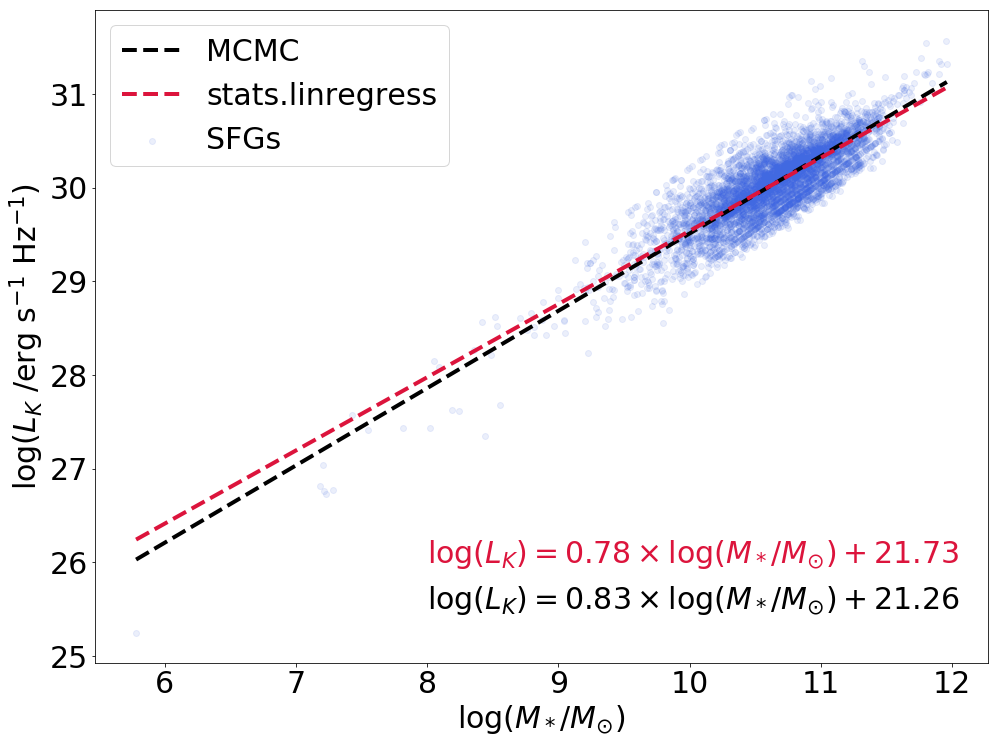

In [26]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

x_plot=np.linspace(df_SFG['MASS_BEST'].min(), df_SFG['MASS_BEST'].max(), 1000)
ax.scatter(df_SFG['MASS_BEST'], df_SFG['L_K'], color='royalblue', alpha=0.1, label='SFGs')

ax.plot(x_plot, param2[0] * x_plot + param1[0], lw=4, color='k', 
         label='MCMC', linestyle='dashed')
ax.text(8, 25.5, 
         r'$\log{(L_K)}=%01.2f \times \log{(M_*/M_{\odot})}+%01.2f$'%(param2[0], param1[0]),
         size=30)

ax.plot(x_plot, slope * x_plot + intercept, lw=4, color='crimson', 
        label='stats.linregress', linestyle='dashed')
ax.text(8, 26, 
         r'$\log{(L_K)}=%01.2f \times \log{(M_*/M_{\odot})}+%01.2f$'%(slope, intercept), 
         size=30, color='crimson')

ax.set_xlabel(r'$\log (M_*/M_{\odot})$')
ax.set_ylabel(r'$\log (L_K$ /${\rm erg\ s^{-1}\ Hz^{-1}})$')

ax.legend(loc='best')